## 데이터 파티션 – 훈련 & 테스트

In [2]:
library(caret)

In [4]:
indexTrain <- createDataPartition(iris$Species, p=0.7, list=F)

training <- iris[indexTrain, ]
testing <- iris[-indexTrain, ]


In [6]:
str(training)

'data.frame':	105 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.7 5 4.6 4.4 4.9 4.8 4.8 4.3 5.8 ...
 $ Sepal.Width : num  3.5 3.2 3.6 3.4 2.9 3.1 3.4 3 3 4 ...
 $ Petal.Length: num  1.4 1.3 1.4 1.4 1.4 1.5 1.6 1.4 1.1 1.2 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.3 0.2 0.1 0.2 0.1 0.1 0.2 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [8]:
table(training$Species)


    setosa versicolor  virginica 
        35         35         35 

In [9]:
table(testing$Species)


    setosa versicolor  virginica 
        15         15         15 

In [12]:
library(rpart)

r <- rpart(Species ~ ., data=training)
r

n= 105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 105 70 setosa (0.3333333 0.3333333 0.3333333)  
  2) Petal.Length< 2.45 35  0 setosa (1.0000000 0.0000000 0.0000000) *
  3) Petal.Length>=2.45 70 35 versicolor (0.0000000 0.5000000 0.5000000)  
    6) Petal.Width< 1.75 39  4 versicolor (0.0000000 0.8974359 0.1025641) *
    7) Petal.Width>=1.75 31  0 virginica (0.0000000 0.0000000 1.0000000) *

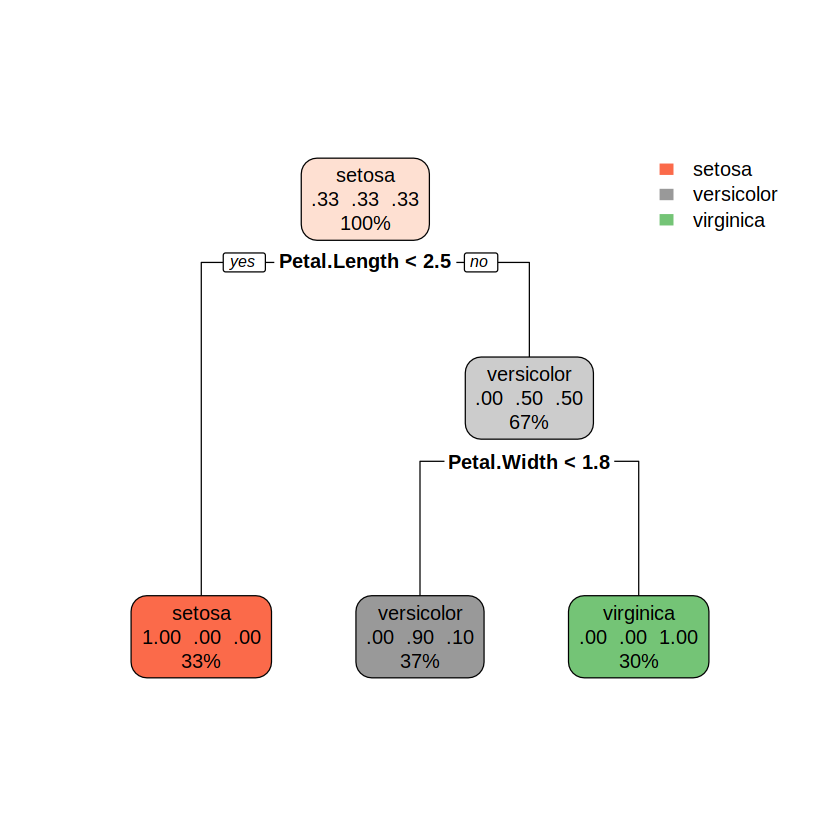

In [14]:
library(rpart.plot)

rpart.plot(r)

In [15]:
testing$predict <- predict(r, testing, type='class')
tail(testing, 10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,predict
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
118,7.7,3.8,6.7,2.2,virginica,virginica
122,5.6,2.8,4.9,2.0,virginica,virginica
125,6.7,3.3,5.7,2.1,virginica,virginica
126,7.2,3.2,6.0,1.8,virginica,virginica
128,6.1,3.0,4.9,1.8,virginica,virginica
129,6.4,2.8,5.6,2.1,virginica,virginica
135,6.1,2.6,5.6,1.4,virginica,versicolor
146,6.7,3.0,5.2,2.3,virginica,virginica
148,6.5,3.0,5.2,2.0,virginica,virginica


In [16]:
table(testing$Species, testing$predict)

            
             setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         1
  virginica       0          1        14

In [17]:
p <- predict(r, testing, type='class')
confusionMatrix(p, testing$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         1
  virginica       0          1        14

Overall Statistics
                                          
               Accuracy : 0.9556          
                 95% CI : (0.8485, 0.9946)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9333          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9333           0.9333
Specificity                 1.0000            0.9667           0.9667
Pos Pred Value              1.0000            0.9333           0.9333
Neg Pred Value              1.0000            0.9667           0.9667
P